# Monthly Time-Series Data for Commodity Prices

### Munish Kumar

This data set contains commodity prices of agricultural raw products. I want to try and perform some time series analysis and see if I can forcast future prices.

#### Import Libraries

In [1]:
# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
sns.set()

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


Declare some global variables

In [2]:
dir_name = 'C:/Users/quant/Anaconda3/@Projects/Time_Series_Commodities'
filename_suffix = 'csv'

Read in the data file

In [3]:
df = pd.read_csv('datasets_677484_1190624_agricultural_raw_material.csv', thousands=',')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

#### Dealing with NaN values

In [4]:
df.any()

Month                           True
Coarse wool Price               True
Coarse wool price % Change      True
Copra Price                     True
Copra price % Change            True
Cotton Price                    True
Cotton price % Change           True
Fine wool Price                 True
Fine wool price % Change        True
Hard log Price                  True
Hard log price % Change         True
Hard sawnwood Price             True
Hard sawnwood price % Change    True
Hide Price                      True
Hide price % change             True
Plywood Price                   True
Plywood price % Change          True
Rubber Price                    True
Rubber price % Change           True
Softlog Price                   True
Softlog price % Change          True
Soft sawnwood Price             True
Soft sawnwood price % Change    True
Wood pulp Price                 True
Wood pulp price % Change        True
dtype: bool

In [5]:
#Total number of values
print ('Total Data Points:\n', df.count().sum())
print('\n')

#Total number of values
print ('Total Data Points per column:\n', df.count())
print('\n')

# Any missing values?
print ('Missing Values?', df.isnull().values.any())
print('\n')

# Total number of missing values
print ('Total Count of Missing values:', df.isnull().sum().sum())
print('\n')

# Total missing values for each feature
print ('Number of Points Missing Per Column:')
print (df.isnull().sum())
print('\n')
       
# % of missing values for each feature
print ('Percentage of Points Missing Per Column:')
print (round(df.isnull().sum()/df.count()*100),3)
print('\n')
       
# % missing values altogether
print ('Percentage of Points Missing in total:', 
       round(df.isnull().sum().sum()/df.count().sum()*100))
print('\n')       

Total Data Points:
 8571


Total Data Points per column:
 Month                           361
Coarse wool Price               327
Coarse wool price % Change      327
Copra Price                     339
Copra price % Change            339
Cotton Price                    361
Cotton price % Change           361
Fine wool Price                 327
Fine wool price % Change        327
Hard log Price                  361
Hard log price % Change         361
Hard sawnwood Price             327
Hard sawnwood price % Change    327
Hide Price                      327
Hide price % change             327
Plywood Price                   361
Plywood price % Change          361
Rubber Price                    361
Rubber price % Change           361
Softlog Price                   327
Softlog price % Change          327
Soft sawnwood Price             327
Soft sawnwood price % Change    327
Wood pulp Price                 360
Wood pulp price % Change        360
dtype: int64


Missing Values? True


Tota

It looks like for some columns, 10% of the data is missing. However, overall, only 5% of the data is NaN.

In [6]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
327,Jul-17,NaN,NaN,1059.0,-5.36%,1.85,-1.07%,NaN,NaN,264.62,...,485.38,-1.40%,1.75,1.74%,NaN,NaN,NaN,NaN,875.0,0.00%
328,Aug-17,NaN,NaN,1062.0,0.28%,1.75,-5.41%,NaN,NaN,270.96,...,497.00,2.39%,1.84,5.14%,NaN,NaN,NaN,NaN,875.0,0.00%
329,Sep-17,NaN,NaN,1015.0,-4.43%,1.78,1.71%,NaN,NaN,268.93,...,493.27,-0.75%,1.86,1.09%,NaN,NaN,NaN,NaN,875.0,0.00%
330,Oct-17,NaN,NaN,989.0,-2.56%,1.73,-2.81%,NaN,NaN,263.62,...,483.53,-1.97%,1.64,-11.83%,NaN,NaN,NaN,NaN,875.0,0.00%
331,Nov-17,NaN,NaN,1038.0,4.95%,1.77,2.31%,NaN,NaN,263.85,...,483.96,0.09%,1.57,-4.27%,NaN,NaN,NaN,NaN,875.0,0.00%
332,Dec-17,NaN,NaN,958.0,-7.71%,1.88,6.21%,NaN,NaN,263.62,...,483.53,-0.09%,1.65,5.10%,NaN,NaN,NaN,NaN,875.0,0.00%
333,Jan-18,NaN,NaN,942.5,-1.62%,2.01,6.91%,NaN,NaN,268.30,...,492.12,1.78%,1.72,4.24%,NaN,NaN,NaN,NaN,875.0,0.00%
334,Feb-18,NaN,NaN,835.0,-11.41%,1.95,-2.99%,NaN,NaN,275.80,...,505.88,2.80%,1.72,0.00%,NaN,NaN,NaN,NaN,875.0,0.00%
335,Mar-18,NaN,NaN,745.0,-10.78%,2.03,4.10%,NaN,NaN,280.72,...,514.90,1.78%,1.76,2.33%,NaN,NaN,NaN,NaN,875.0,0.00%
336,Apr-18,NaN,NaN,756.0,1.48%,2.03,0.00%,NaN,NaN,276.70,...,507.53,-1.43%,1.73,-1.70%,NaN,NaN,NaN,NaN,875.0,0.00%


A final check shows that all the data that is missing is located in the last few rows. I will drop this and move on with the analysis.

In [7]:
df_preproc = df.dropna(axis = 0)
print ('Missing Values?', df_preproc.isnull().values.any())

Missing Values? False


In [8]:
# Column Names
df_preproc.columns.values

array(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price',
       'Fine wool price % Change', 'Hard log Price',
       'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price',
       'Hide price % change', 'Plywood Price', 'Plywood price % Change',
       'Rubber Price', 'Rubber price % Change', 'Softlog Price',
       'Softlog price % Change', 'Soft sawnwood Price',
       'Soft sawnwood price % Change', 'Wood pulp Price',
       'Wood pulp price % Change'], dtype=object)

In [9]:
# Drop all % increase files and recompute. 
# (For some reason, manipulation of the object frame was problematic)

cols = [
    'Coarse wool price % Change',
    'Copra price % Change', 
    'Cotton price % Change',
    'Fine wool price % Change',
    'Hard log price % Change',
    'Hard sawnwood price % Change',
    'Hide price % change', 
    'Plywood price % Change',
    'Rubber price % Change',
    'Softlog price % Change',
    'Soft sawnwood price % Change',
    'Wood pulp price % Change'       
]

df_preproc = df_preproc.drop(cols, axis = 1)
df_preproc

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,Apr-90,482.34,236.00,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,May-90,447.26,234.00,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,Jun-90,440.99,216.00,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,Jul-90,418.44,205.00,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,Aug-90,418.44,198.00,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Feb-17,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
323,Mar-17,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
324,Apr-17,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00
325,May-17,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.00


#### Check the Month column, convert if necessary to time-series

In [10]:
df_preproc['Month'].describe()

count        327
unique       327
top       Feb-10
freq           1
Name: Month, dtype: object

In [11]:
# The 'MM-YR' format was incompatible with just a straight datetime conversion
# I need to convert to a list and then pass it to format codes (%Y, %m, %d etc)
# %b - first 3 letters of month 
# The strptime() class method takes two arguments: string (that be converted 
# to datetime) + format code & the method returns its equivalent datetime object.
# The strftime() method takes one or more format codes as an argument and returns
# a formatted string based on it. 

dfa=df_preproc['Month'].tolist()
# E.g. of Output is '1990-04-01'
#df_preproc['Month']=[datetime.datetime.strptime(x,'%b-%y') for x in dfa]
df_preproc['Month']=[datetime.datetime.strptime(x,'%b-%y').strftime('%Y-%m') for x in dfa]
df_preproc

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,1990-04,482.34,236.00,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,1990-05,447.26,234.00,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,1990-06,440.99,216.00,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,1990-07,418.44,205.00,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,1990-08,418.44,198.00,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2017-02,1029.58,1146.25,1.88,1368.14,263.45,680.49,76.58,483.23,2.71,157.58,287.43,875.00
323,2017-03,1059.60,1016.00,1.91,1454.83,263.48,672.48,77.93,483.27,2.35,160.05,300.42,875.00
324,2017-04,991.12,1044.00,1.92,1404.98,270.34,688.44,75.43,495.87,2.21,159.84,306.60,875.00
325,2017-05,1019.95,1112.50,1.95,1433.47,265.28,704.52,69.36,486.59,2.10,159.84,306.60,875.00


In [12]:
# From Text to Date
df_preproc['Month'] = pd.to_datetime(df_preproc['Month'])
df_preproc.head()

,Month,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
0,1990-04-01,482.34,236.0,1.83,1071.63,161.20,549.91,100.00,312.36,0.84,120.66,218.76,829.29
1,1990-05-01,447.26,234.0,1.89,1057.18,172.86,491.88,99.46,350.12,0.85,124.28,213.00,842.51
2,1990-06-01,440.99,216.0,1.99,898.24,181.67,495.39,97.90,373.94,0.85,129.45,200.00,831.35
3,1990-07-01,418.44,205.0,2.01,895.83,187.96,485.86,96.75,378.48,0.86,124.23,210.05,798.83
4,1990-08-01,418.44,198.0,1.79,951.22,186.13,487.52,91.89,364.60,0.88,129.70,208.30,818.74


In [13]:
df_preproc['Month'].describe()

count                     327
unique                    327
top       2009-09-01 00:00:00
freq                        1
first     1990-04-01 00:00:00
last      2017-06-01 00:00:00
Name: Month, dtype: object

In [14]:
# Set Month as the Index
df_preproc.set_index("Month", inplace = True)

#### Setting the desired frequency

I am changing the frequency of the data set so that it is on a monthly basis; also I want to start of each month to be the first of the month. 

In [15]:
df_preproc  = df_preproc.asfreq('MS')
df_preproc.describe(include='all')

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,626.333731,529.148532,1.621376,850.119572,248.984343,707.950367,78.566667,509.422691,1.660765,164.527462,291.061713,678.674373
std,299.638838,264.097498,0.532764,285.075196,68.621751,144.563241,13.690623,93.685312,1.067676,25.596308,34.113959,158.292658
min,247.090000,182.000000,0.820000,417.470000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,369.620000,368.000000,1.275000,646.345000,194.695000,573.470000,69.495000,434.055000,0.840000,145.970000,277.590000,544.705000
50%,525.070000,449.000000,1.540000,748.180000,247.320000,728.710000,77.250000,512.340000,1.330000,160.370000,294.960000,662.540000
75%,847.120000,656.750000,1.830000,1019.870000,286.970000,831.635000,86.000000,581.690000,2.155000,180.210000,310.865000,832.170000
max,1391.470000,1503.000000,5.060000,1865.440000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


After all that manipulation, we see that there is not any new data created. The main thing is that now we are sure the data is monthly, and the the month column is the index, in the right date-time format. 

In [16]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 1990-04-01 to 2017-06-01
Freq: MS
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Coarse wool Price    327 non-null    float64
 1   Copra Price          327 non-null    float64
 2   Cotton Price         327 non-null    float64
 3   Fine wool Price      327 non-null    float64
 4   Hard log Price       327 non-null    float64
 5   Hard sawnwood Price  327 non-null    float64
 6   Hide Price           327 non-null    float64
 7   Plywood Price        327 non-null    float64
 8   Rubber Price         327 non-null    float64
 9   Softlog Price        327 non-null    float64
 10  Soft sawnwood Price  327 non-null    float64
 11  Wood pulp Price      327 non-null    float64
dtypes: float64(12)
memory usage: 33.2 KB


I now create a second data frame with all the % differences (i.e. returns) that I dropped earlier. If needed, this 2nd dataframe will be available for use in the machine learning algorithms I will discuss. For now, this is being written out as a checkpoint file

In [38]:
# .mul is to multiply everything by 100
df_prcnt = df_preproc.pct_change(fill_method ='ffill').mul(100)
df_prcnt=df_prcnt.iloc[1:] #Row 0 is null, slice to row 1 as new index 0
df_prcnt.head()

,Coarse wool Price,Copra Price,Cotton Price,Fine wool Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
Month,,,,,,,,,,,,
1990-05-01,-7.272878,-0.847458,3.278689,-1.348413,7.233251,-10.552636,-0.540000,12.088616,1.190476,3.000166,-2.633022,1.594135
1990-06-01,-1.401869,-7.692308,5.291005,-15.034337,5.096610,0.713589,-1.568470,6.803382,0.000000,4.159961,-6.103286,-1.324613
1990-07-01,-5.113495,-5.092593,1.005025,-0.268302,3.462322,-1.923737,-1.174668,1.214099,1.176471,-4.032445,5.025000,-3.911710
1990-08-01,0.000000,-3.414634,-10.945274,6.183093,-0.973611,0.341662,-5.023256,-3.667301,2.325581,4.403123,-0.833135,2.492395
1990-09-01,-1.496033,-1.010101,0.000000,-1.519102,-0.429807,0.047178,-4.603330,5.573231,2.272727,0.061681,-4.181469,-0.869629


#### Checkpoint File

In [18]:
base_filename = 'Clean_Data_raw'
csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
df_preproc.to_csv(csvs_sht, index = True, header = True)
print ("Final File Extract Produced:", base_filename + "." + filename_suffix)

Final File Extract Produced: Clean_Data_raw.csv


In [19]:
base_filename = 'Clean_Data_percent'
csvs_sht = os.path.join(dir_name, base_filename + "." + filename_suffix)
df_prcnt.to_csv(csvs_sht, index = True, header = True)
print ("Final File Extract Produced:", base_filename + "." + filename_suffix)

Final File Extract Produced: Clean_Data_percent.csv


#### Test for Stationarity (Dickey-Fuller Method)

In [20]:
import statsmodels.tsa.stattools as sts

This bit requires some explanation. I will be using an augmented Dickey–Fuller test (ADF) to determine if the null hypothesis has a unit root present in a time series sample. What this means is:
 - Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
 - Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
  
Statsmodel has a method to do this; the output is as follows:

- 1st Value is Critical Values (t-statistic), compared against 1%, 5%, 15% values from DF table
- 2nd Value is p-value associated with t-statistic. ~X% of NOT rejecting the null
- 3rd number is no of lags used in regression when determining t-stats i.e. how much autocorrelation
- 4th value is number of observations used in analysis; depends on number of lags used in regression so this and 3rd sum up to data set size
- 5, 6, 7th are the critical values from DF table
- 8th value is maximized information criteria provided there is some apparent autocorrelation Lower the value, easier to make prediction for future

In [42]:
sts.adfuller(df_preproc['Coarse wool Price'])

(-1.244042922634567,
 0.654368590039101,
 10,
 316,
 {'1%': -3.4512146067362317,
  '5%': -2.870730188960711,
  '10%': -2.5716664849383113},
 3063.710681511846)

The price data set is not a stationary process. ARMA cannot be used in the time-series modelling

In [21]:
# The Dickey-Fuller (DF), adfuller, method on prices 
adf_result = {}
for col in df_preproc.columns.values:  
    adf_result[col] = sts.adfuller(df_preproc[col])
    
list_a = [k for k, v in adf_result.items() if v[1] < 0.05]
list_b = [k for k, v in adf_result.items() if v[1] > 0.05]

print(list_a)
print(list_b)

['Cotton Price', 'Hide Price', 'Softlog Price', 'Soft sawnwood Price']
['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Plywood Price', 'Rubber Price', 'Wood pulp Price']


In fact, based on the above, and assuming a 5% level of significance, only 4 of the items are stationary processes

In [41]:
sts.adfuller(df_prcnt['Coarse wool Price'])

(-13.34511695288562,
 5.815560507022924e-25,
 0,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 1869.5623094545833)

The returns data set is a stationary process. The test statistic (-13.3%) is far to the "left" of even the 1% critical value (-3%). Therefore, ARMA is suitable for use in the time-series modelling.

In [43]:
# The Dickey-Fuller (DF), adfuller, method on returns
adf_result2 = {}
for col in df_prcnt.columns.values:  
    adf_result2[col] = sts.adfuller(df_prcnt[col])
    
list_c = [k for k, v in adf_result2.items() if v[1] < 0.01]
list_d = [k for k, v in adf_result2.items() if v[1] > 0.01]

print(list_c)
print(list_d)

['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']
[]


In fact, for the returns data set, it fully satisfies the test of stationarity at even the 1% significance level.

#### Test for Autocorrelation

In [22]:
import statsmodels.graphics.tsaplots as sgt

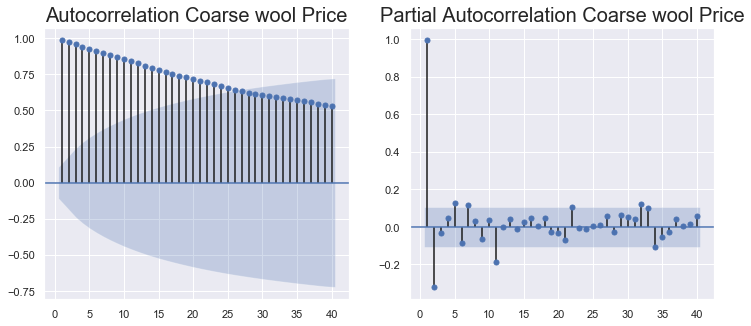

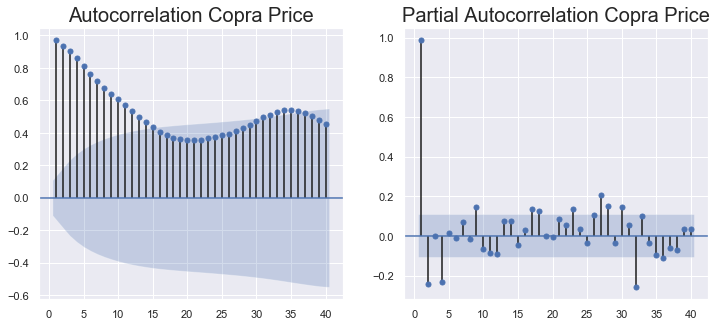

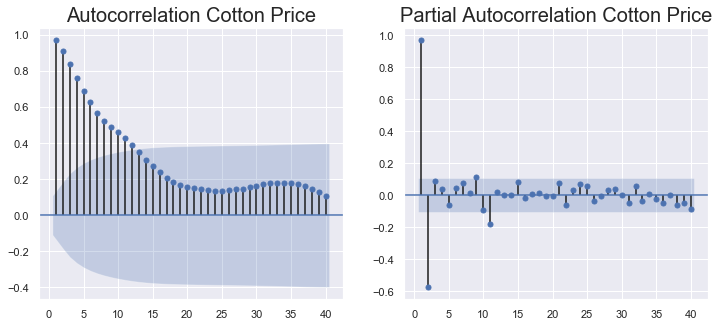

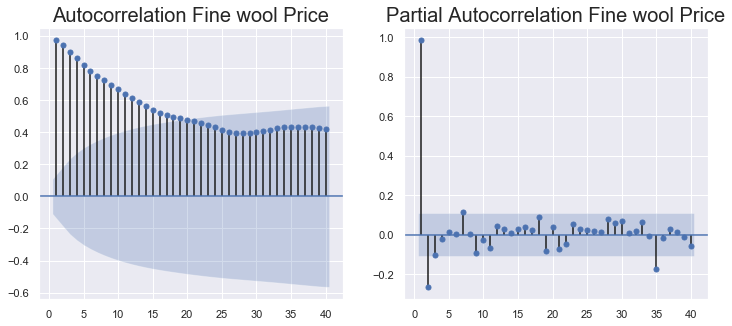

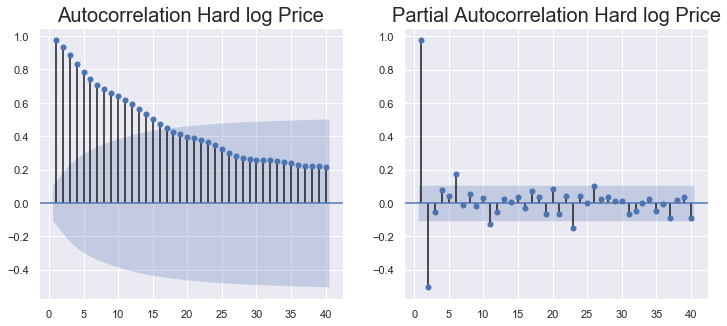

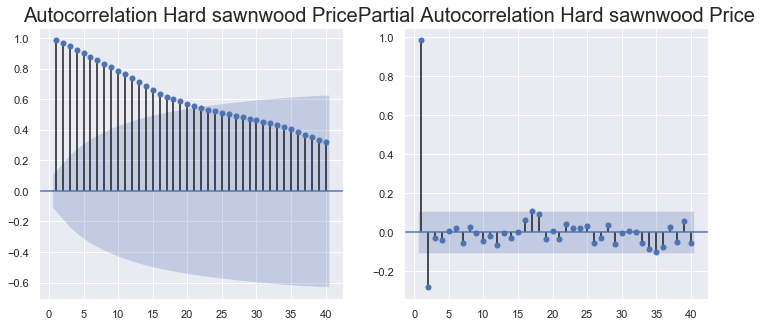

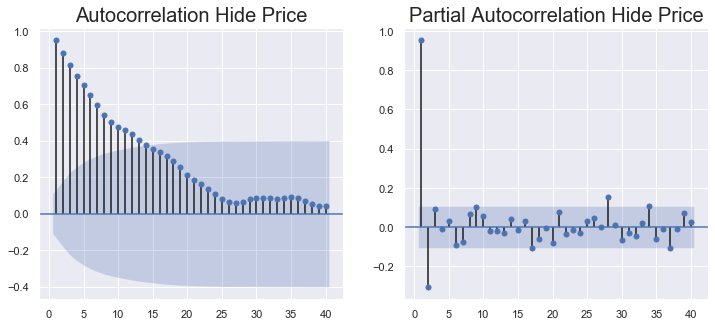

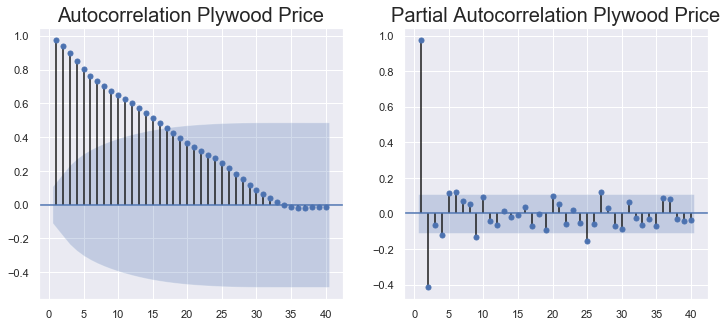

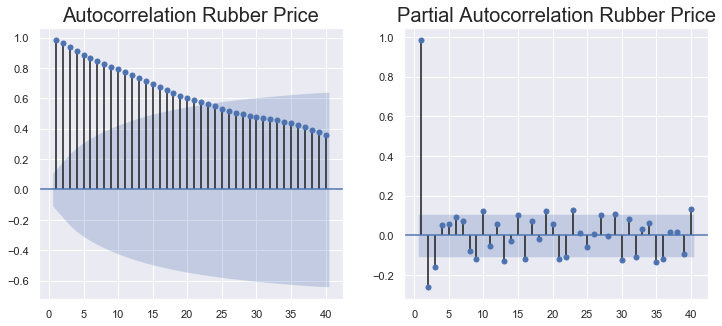

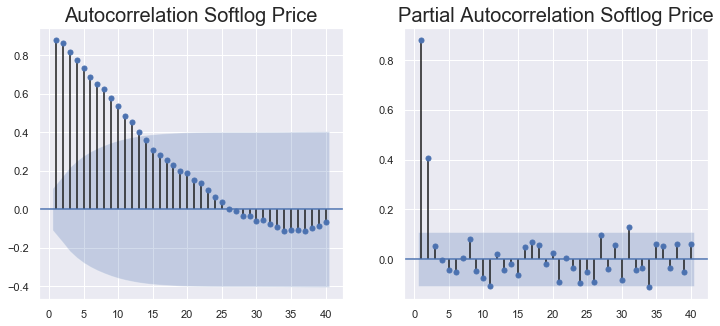

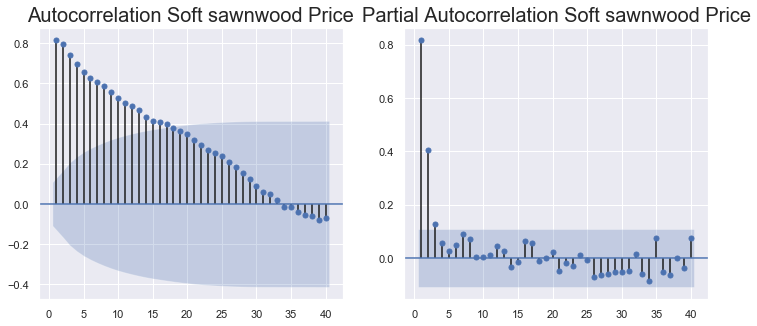

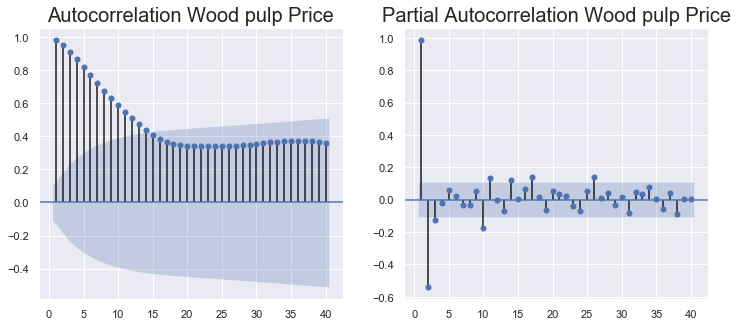

In [23]:
# Since this can take a long time, time-series analysis just focuses on the first 40
acf = {}
pacf = {}

# Loop for each column in the dataframe individual auto- and partial
# auto-correlation plots
for col in df_preproc.columns.values:
    fig, ax = plt.subplots(1,2,figsize=(12,5))    
    acf[col] = sgt.plot_acf(df_preproc[col], lags = 40, zero = False, ax=ax[0])
    ax[0].set_title("Autocorrelation %s" %col, size = 20)
    
    pacf[col] = sgt.plot_pacf(df_preproc[col], lags=40, zero = False, method=('ols'), ax=ax[1])
    ax[1].set_title("Partial Autocorrelation %s" %col, size = 20)
    
plt.show()

#### Test for Seasonality

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')

In [26]:
df_preproc.columns.values

array(['Coarse wool Price', 'Copra Price', 'Cotton Price',
       'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
       'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
       'Soft sawnwood Price', 'Wood pulp Price'], dtype=object)

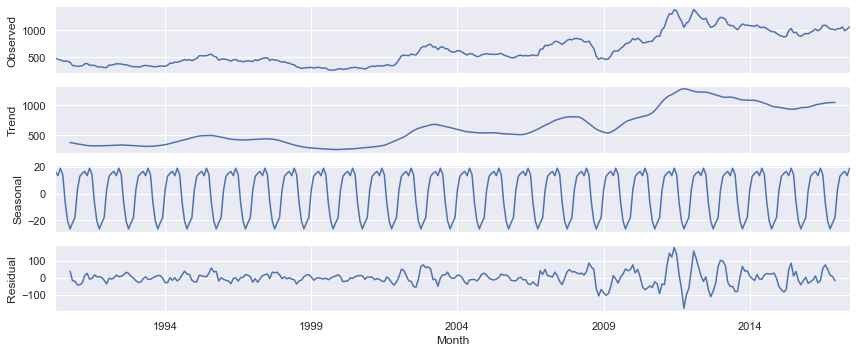

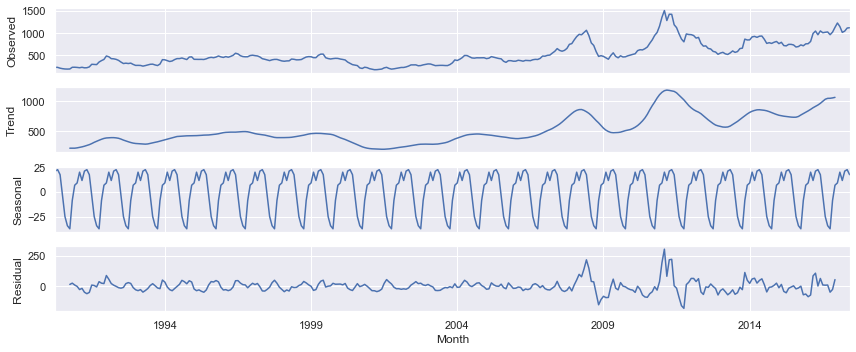

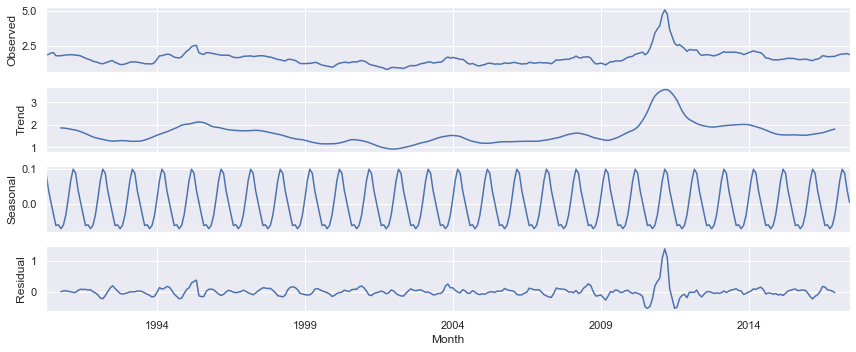

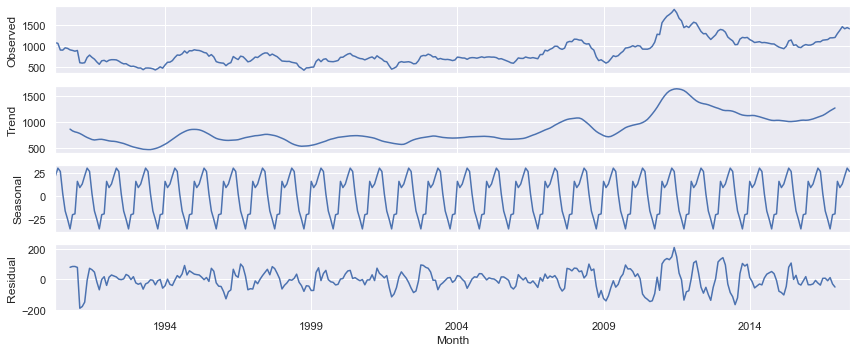

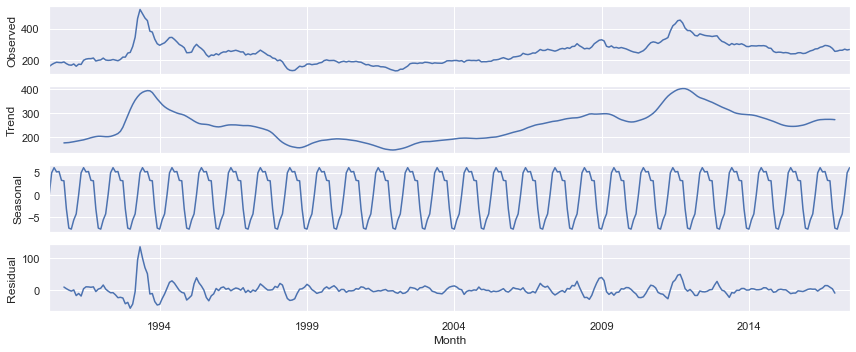

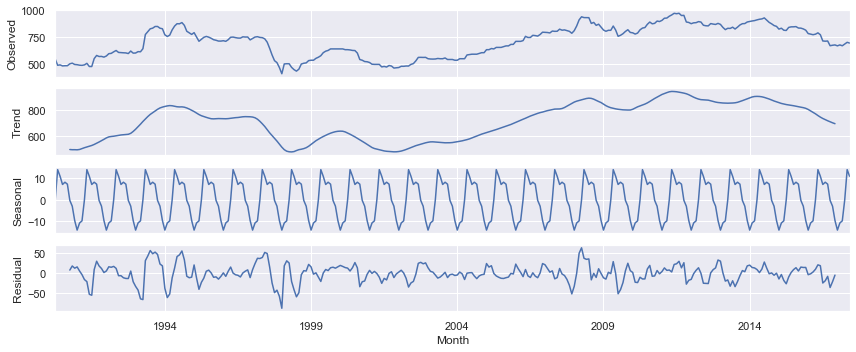

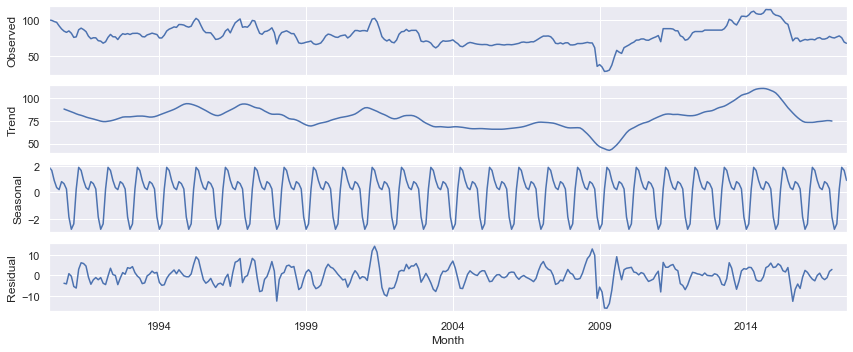

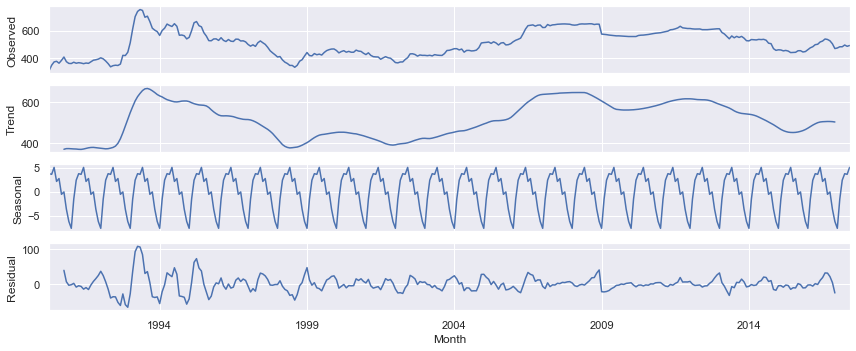

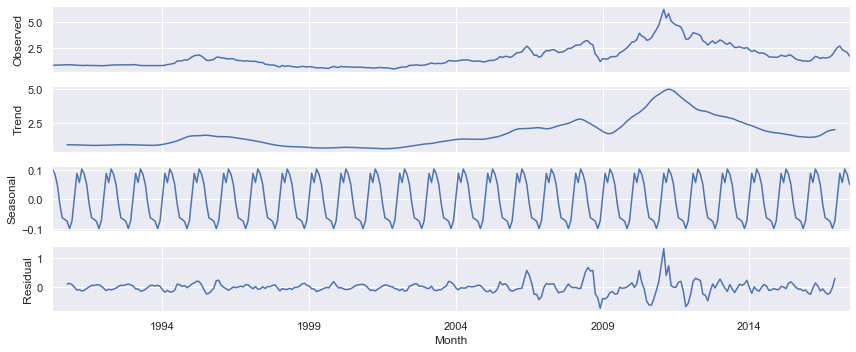

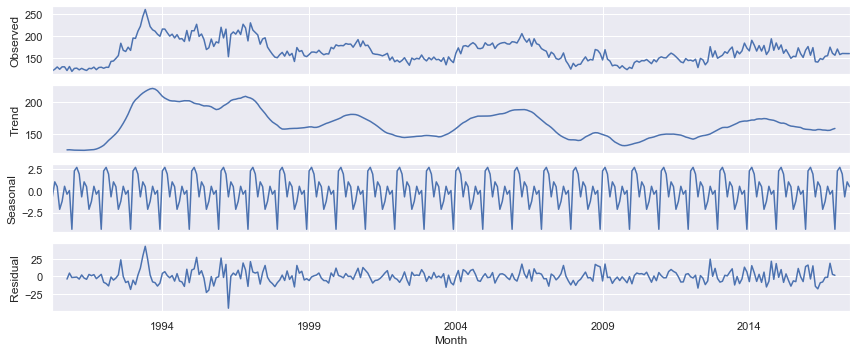

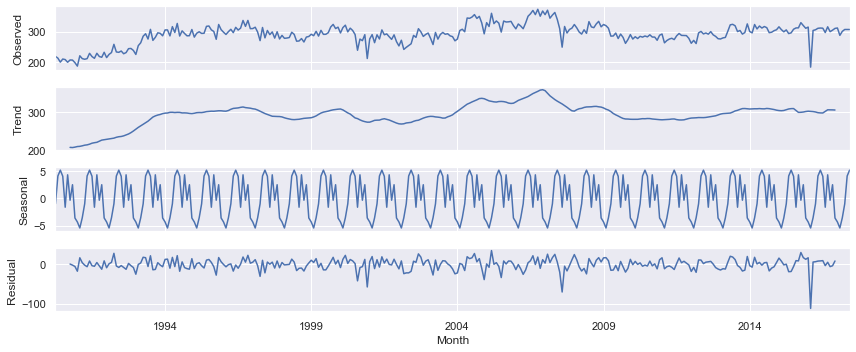

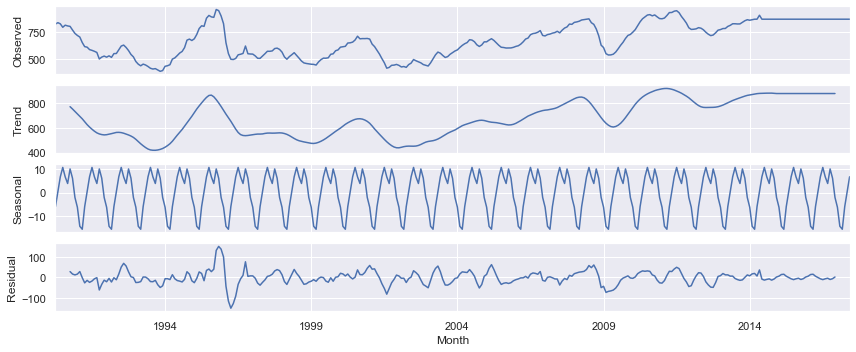

In [27]:
res = {}

for col in df_preproc.columns.values:
    fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,5))
    res[col] = seasonal_decompose(df_preproc[col], model = 'additive')
    plotseasonal(res[col], axes[:])
    plt.tight_layout()
    plt.show()

#### Split the Data 

Do an 70-20-10 split. Note that for time-series this data set cannot be randomized. Therefore the split must be done with the first 70% as training and the next 20% as testing. I also want to create a validation set. I will take this as the last 10%.

In [28]:
size = int(len(df_preproc)*0.7)
size2 = size-int(len(df_preproc)*0.9)

df_train = df_preproc.iloc[:size]
df_test = df_preproc.iloc[size:size2]
df_validate = df_preproc.iloc[size2:]

In [29]:
# Ensure that the start and end points of each set is unique and no overlap
print(df_train.tail(2))
print(df_test.head(2))
print('-------------------------------------------------------------------------------------\n')
print(df_test.tail(2))
print(df_validate.head(2))

            Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
Month                                                                       
2009-02-01             449.72        446.0          1.22           586.26   
2009-03-01             460.47        416.0          1.14           617.15   

            Hard log Price  Hard sawnwood Price  Hide Price  Plywood Price  \
Month                                                                        
2009-02-01          322.45               806.65       34.79         572.96   
2009-03-01          288.57               815.86       28.59         570.79   

            Rubber Price  Softlog Price  Soft sawnwood Price  Wood pulp Price  
Month                                                                          
2009-02-01          1.46         168.55               319.02           549.83  
2009-03-01          1.43         147.09               310.82           537.70  
            Coarse wool Price  Copra Price  Cotton Price  

In [31]:
df_train.columns.values

array(['Coarse wool Price', 'Copra Price', 'Cotton Price',
       'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
       'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
       'Soft sawnwood Price', 'Wood pulp Price'], dtype=object)

#### Import ARIMA libraries

In [32]:
from statsmodels.tsa.arima_model import ARMA

#### Log-Likelihood Ratio Test (LLR) that allows us to compare models

In [33]:
from scipy.stats.distributions import chi2

# To compare models with single degree of freedom
# .llf method extracts the log-likelihood
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

#### The AR(n) Model [n = 1 to 10]

Formula to fit is:

$
\begin{align}
x_t = C + \varphi(X_{t-1})+ \epsilon_t
\end{align}
$

In [34]:
# First order auto regressive model - order=(1,0) means we are only taking 1 past value
# and 0 means we are not taking any of the residual values into consideration

model_ar_1 = ARMA(df_train['Coarse wool Price'], order=(1,0))
results_ar_1 = model_ar_1.fit()
print(results_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:      Coarse wool Price   No. Observations:                  228
Model:                     ARMA(1, 0)   Log Likelihood               -1065.684
Method:                       css-mle   S.D. of innovations             25.735
Date:                Mon, 20 Jul 2020   AIC                           2137.368
Time:                        13:09:06   BIC                           2147.657
Sample:                    04-01-1990   HQIC                          2141.519
                         - 03-01-2009                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     463.2821     76.619      6.047      0.000     313.111     613.454
ar.L1.Coarse wool Price     0.9816      0.010     94.069      0.000       0.961       1.002


As a test, for an AR(1), run on 'Coarse wool Price', the coefficients are:
1. C: const = 463.2821 	
2. $\varphi$: ar.L1.Coarse wool Price = 0.9816 (value from 1 lag ago)

Standard errors listed above are a measure of how far, on average, model prediciton is from true value
Z column contains associated test statistics for significance, with p values on right.
As p values are both '0', it can be concluded that the constant and 1-lag value are significantly different from 0.
Last 2 columns are critical values for 95% confidence interval. If '0' is not a part of it, the coefficients are significant

In [36]:
# Second order auto regressive model - order=(2,0) means we are only taking 2 past value
# and 0 means we are not taking any of the residual values into consideration

model_ar_2 = ARMA(df_train['Coarse wool Price'], order=(2,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())
print("\nLLR test p-value = " +str(LLR_test(model_ar_2, model_ar_1)))

                              ARMA Model Results                              
Dep. Variable:      Coarse wool Price   No. Observations:                  228
Model:                     ARMA(2, 0)   Log Likelihood               -1055.881
Method:                       css-mle   S.D. of innovations             24.638
Date:                Mon, 20 Jul 2020   AIC                           2119.762
Time:                        13:09:25   BIC                           2133.479
Sample:                    04-01-1990   HQIC                          2125.297
                         - 03-01-2009                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     464.1496     66.217      7.010      0.000     334.367     593.932
ar.L1.Coarse wool Price     1.2653      0.063     19.961      0.000       1.141       1.390


## Conclusion

In [ ]:
count = 'Completed Process'
elapsed = (time.time() - start)
print ("%s in %s seconds" % (count,elapsed))

In [30]:
#plt.figure(figsize=(20, 5))
#groups = df.groupby(Grouper(freq = 'A'))
#years = dataFrame()
#for name, group in groups:
#    year[name.year]= groups.values
#years.plot(subplots=True, legend = False)
#
#plt.show()